## Anirudh Jagannath

## Task 6- Prediction using Decision Tree Algorithm
- For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. 
- The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split  
import seaborn as sb
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree 

### READING DATASET

In [2]:
# Load the iris dataset
iris_df = pd.read_csv('Iris.csv')
iris_df.head() # See the first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris_df.shape

(150, 6)

There are 150 rows and 4 columns.

In [4]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


It can be observed that all the features have different means and standard deviations.

### CHECKING NULL VALUES

In [5]:
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

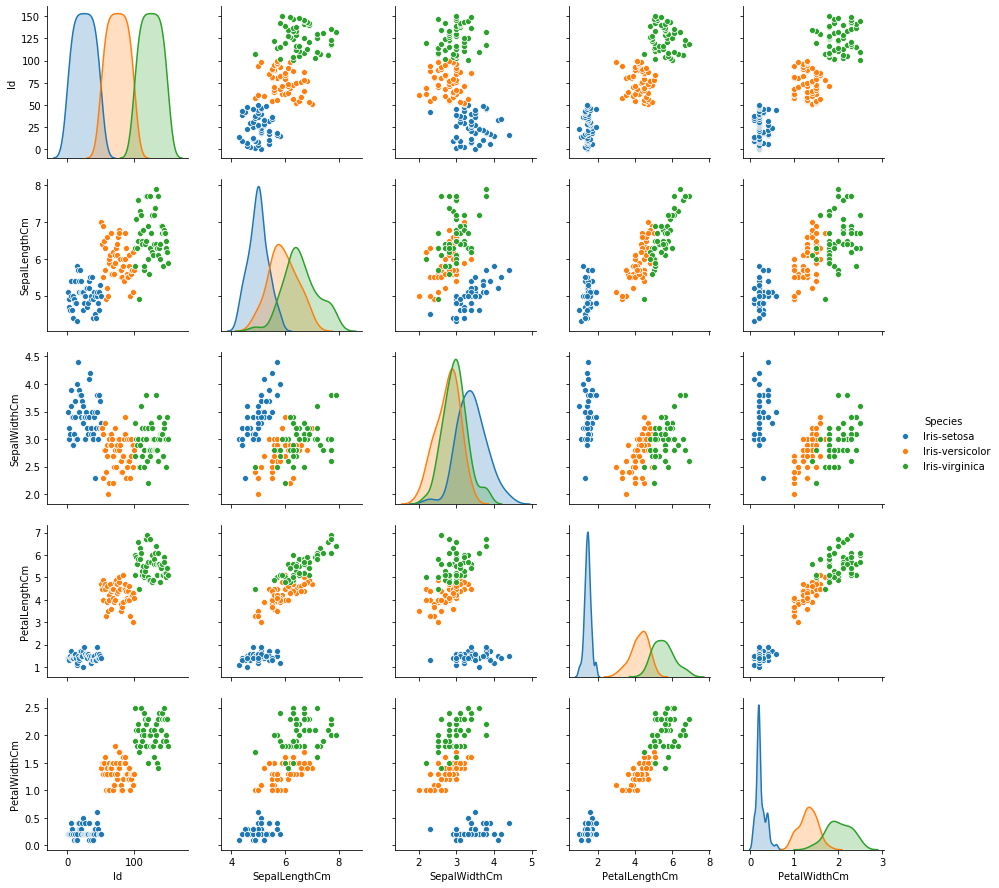

In [6]:
sb.pairplot(iris_df,hue='Species')

### SPLITTING DATA
1. The independent features :- SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm.
2. The dependent feature :-the species of flower.

In [7]:
# Independent variables 
X=iris_df.iloc[:,1:5]

# Dependent variable
Y=iris_df['Species']

print(X.shape,Y.shape)

(150, 4) (150,)


In [8]:
Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

### SPLITTING INTO TEST & TRAIN

In [10]:
# Spliting in TEST & TRAIN
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0,stratify=Y)

In [11]:
# For checking the distribution in the training dataset
y_train=pd.Series(y_train)
y_train.value_counts(normalize=True)

Iris-virginica     0.333333
Iris-setosa        0.333333
Iris-versicolor    0.333333
Name: Species, dtype: float64

### TRAINING MODEL

In [12]:
dtree_clf=DecisionTreeClassifier(criterion = "entropy")
dtree_clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

- Selecting best hyperparameter to prun tree

### VISUALIZING TREE


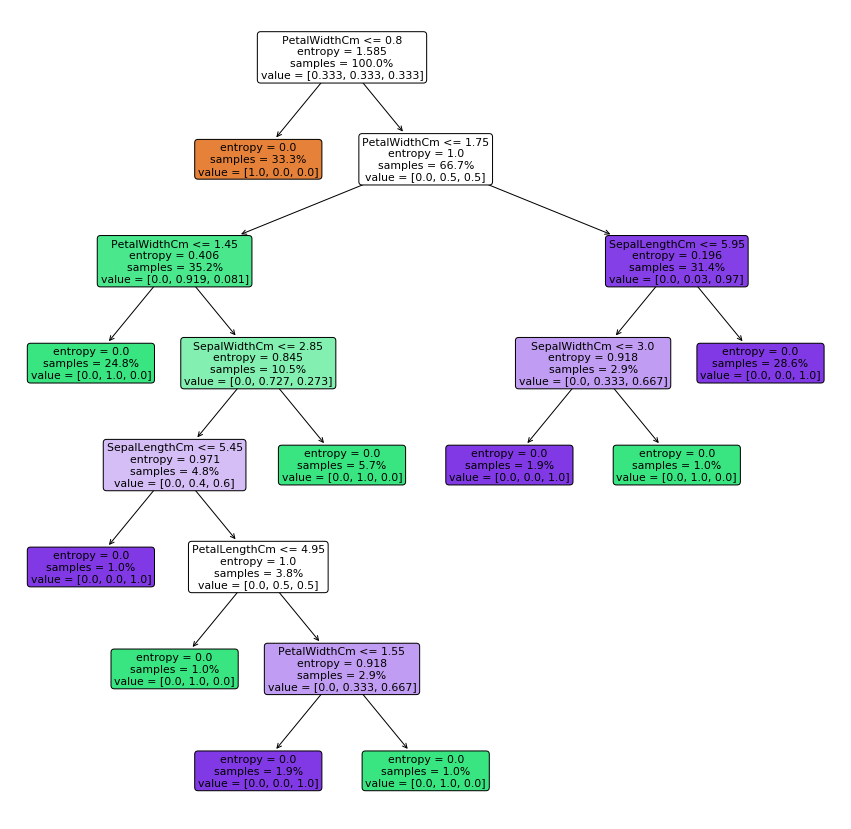

In [13]:
cols=list(X.columns.values)
plt.figure(figsize=(15,15))
tree.plot_tree(dtree_clf,feature_names=cols,
               filled=True,precision=3,proportion=True,rounded=True)
plt.show()

### PREDICTING

In [14]:
y_pred=dtree_clf.predict(x_test)

In [15]:
#Checking Misclassification
cm=confusion_matrix(y_test,y_pred)
cm

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  2, 13]], dtype=int64)

- From confusion matrix, it can be observed that there is 1 misclassification.

In [17]:
dtree_clf.score(x_test,y_test)

0.9555555555555556

- The accuracy score in case of testing it is 95.55%.

### INFERENCE
 - Model was built as per the probem statement and the accuracy score of the model is 95.55%. with the testing data.